In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2
from PIL import Image

I use CLAHE(Contrast Limited Adaptive Histogram Equalisation) technique to amplify contrast in localized regions, making it easy to segment objects with varying contrast or uneven lighting conditions.

(720, 960, 3)


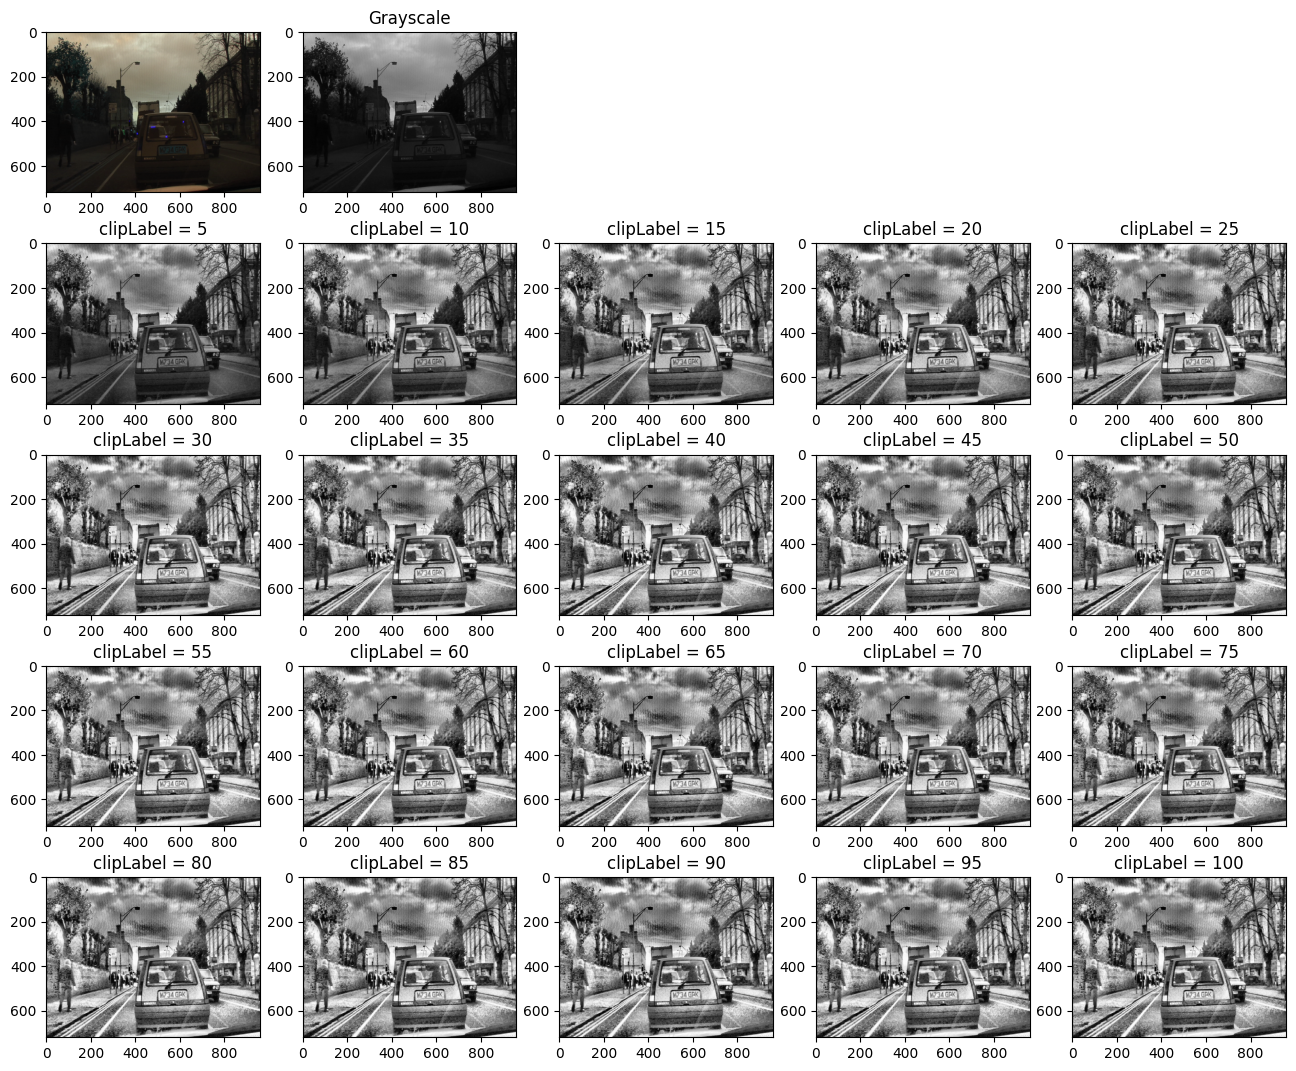

<class 'numpy.ndarray'>


In [2]:
image = cv2.imread('CamVid/train/0001TP_009210.png')
print(image.shape)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (16,16))
plt.subplot(6,5,1)
plt.imshow(image)
plt.subplot(6,5,2)
plt.title("Grayscale")
plt.imshow(gray_image, cmap = "gray")
for i in range(5,101,5):
    plt.subplot(6,5,5+(int)(i/5))
    plt.title(f"clipLabel = {i}")
    clahe = cv2.createCLAHE(clipLimit = i)
    c_img = clahe.apply(gray_image)
    type_img = type(c_img)
    plt.imshow(c_img, cmap = "gray")
plt.show()
print(type_img)

<Figure size 640x480 with 0 Axes>

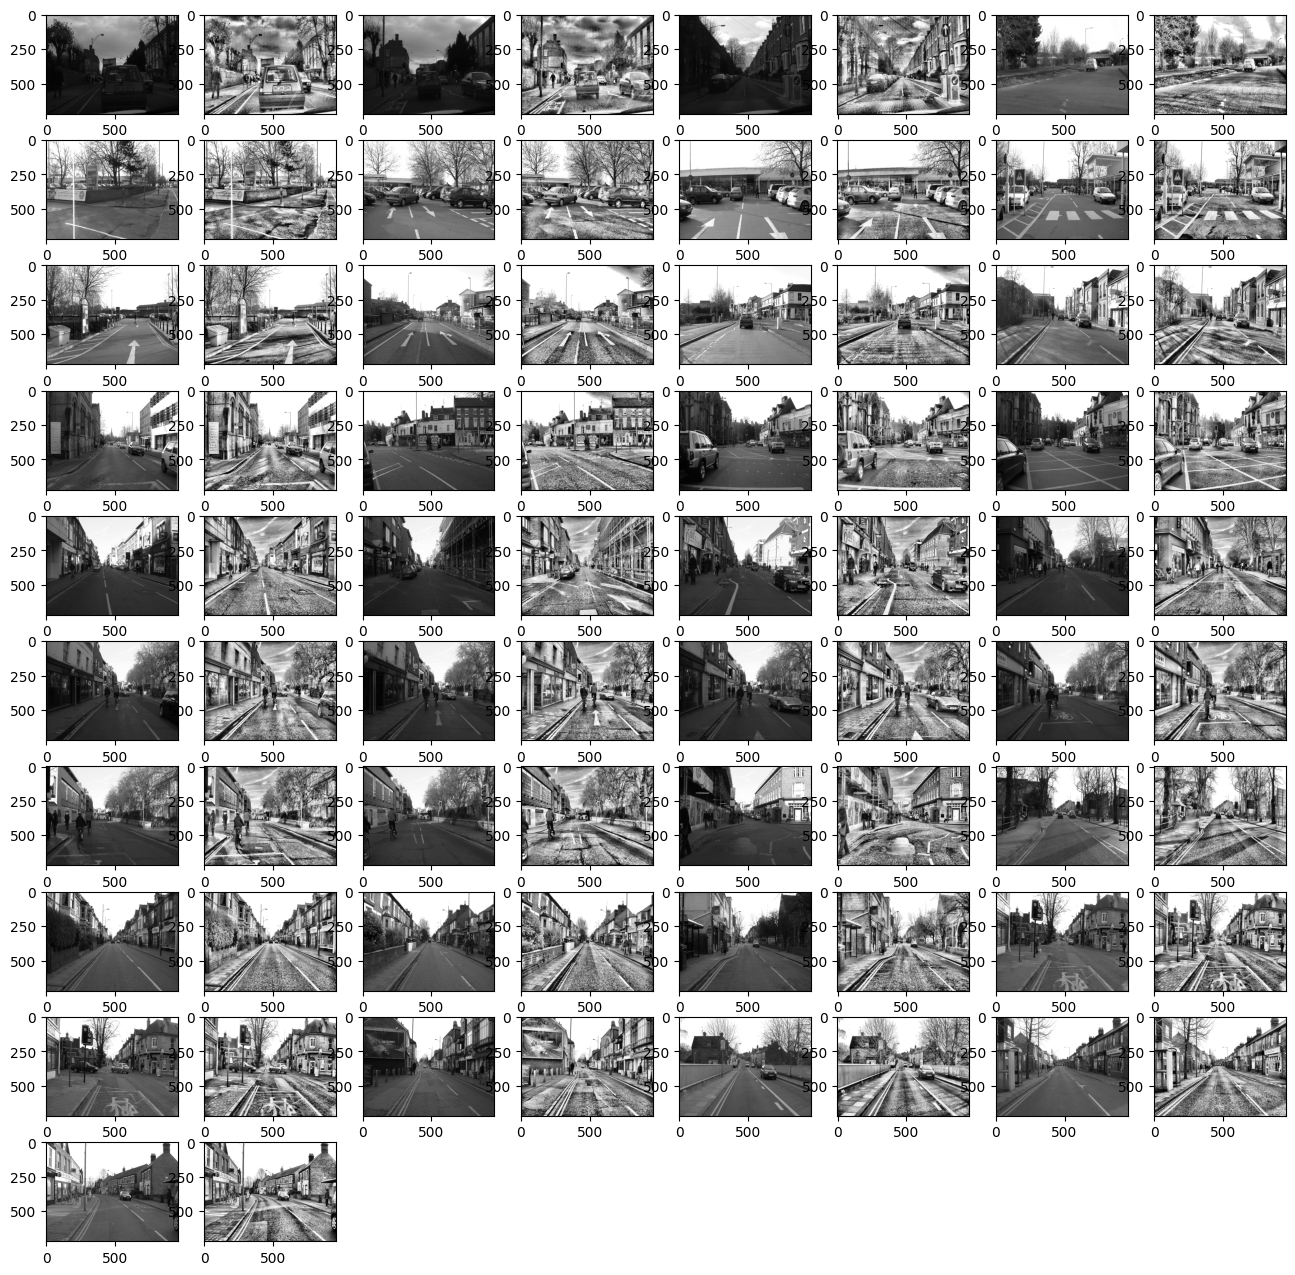

In [3]:
img_names = list(os.listdir("Camvid/train"))
img_names.remove(".ipynb_checkpoints")
# plt.tight_layout()
plt.figure().suptitle("Clip Limit = 40")
plt.figure(figsize = (16,16))
for i in range(0,len(img_names),10):
    image = cv2.imread('CamVid/train/'+img_names[i])
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(10,8,1+(int)(i/5))
    plt.imshow(gray_image, cmap = "gray")
    plt.subplot(10,8,(int)(i/5)+2)
    clahe = cv2.createCLAHE(clipLimit = 40)
    c_img = clahe.apply(gray_image)
    plt.imshow(c_img, cmap = "gray")
plt.show()

# Applying CLAHE to training images

## Train:

In [12]:
clahe = cv2.createCLAHE(clipLimit = 40)
for filename in os.listdir("CamVid/train"):
    if filename == ".ipynb_checkpoints":
        continue

    # Name of processed train image
    processed_file_name = filename[:-4] + "_P" + filename[-4:]
    
    image = cv2.imread('CamVid/train/'+filename)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    processed_image = clahe.apply(gray_image)
    
    processed_image = processed_image.astype(np.uint8)
    save_image = Image.fromarray(processed_image, mode = 'L') # Saving as grayscale image 
    save_image.save("CamVid/train_processed/" + processed_file_name)

In [13]:
print(len(os.listdir("CamVid/train_labels")))
print(len(os.listdir("CamVid/train_labels_processed")))

370
370


(720, 960)
0001TP_009210.png 0001TP_009210_P.png


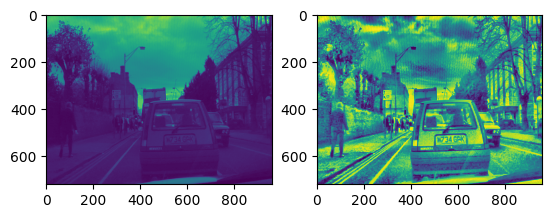

In [14]:
for filename in os.listdir("CamVid/train"):
    if filename == ".ipynb_checkpoints":
        continue
    processed_file_name = filename[:-4] + "_P" + filename[-4:]
    ori_image = np.array(Image.open("CamVid/train/" + filename).convert('L'))
    processed_image = np.array(Image.open("CamVid/train_processed/" + processed_file_name).convert('L'))
    print(processed_image.shape)
    print(filename, processed_file_name)
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(ori_image)
    # ax1.title("original image")
    ax2.imshow(processed_image)
    # ax2.title("processed image")
    break

## Test:

In [5]:
clahe = cv2.createCLAHE(clipLimit = 40)
for filename in os.listdir("CamVid/test"):
    if filename == ".ipynb_checkpoints":
        continue

    # Name of processed train image
    processed_file_name = filename[:-4] + "_P" + filename[-4:]
    
    image = cv2.imread('CamVid/test/'+filename)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    processed_image = clahe.apply(gray_image)
    
    processed_image = processed_image.astype(np.uint8)
    save_image = Image.fromarray(processed_image, mode = 'L') # Saving as grayscale image 
    save_image.save("CamVid/test_processed/" + processed_file_name)

In [6]:
print(len(os.listdir("CamVid/test_labels")))
print(len(os.listdir("CamVid/test_labels_processed")))

233
233


(720, 960)
0001TP_006690.png 0001TP_006690_P.png


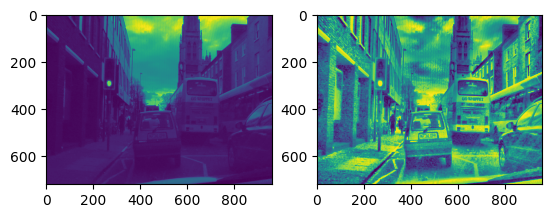

In [7]:
for filename in os.listdir("CamVid/test"):
    if filename == ".ipynb_checkpoints":
        continue
    processed_file_name = filename[:-4] + "_P" + filename[-4:]
    ori_image = np.array(Image.open("CamVid/test/" + filename).convert('L'))
    processed_image = np.array(Image.open("CamVid/test_processed/" + processed_file_name).convert('L'))
    print(processed_image.shape)
    print(filename, processed_file_name)
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(ori_image)
    # ax1.title("original image")
    ax2.imshow(processed_image)
    # ax2.title("processed image")
    break

## Val:

In [8]:
clahe = cv2.createCLAHE(clipLimit = 40)
for filename in os.listdir("CamVid/val"):
    if filename == ".ipynb_checkpoints":
        continue

    # Name of processed train image
    processed_file_name = filename[:-4] + "_P" + filename[-4:]
    
    image = cv2.imread('CamVid/val/'+filename)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    processed_image = clahe.apply(gray_image)
    
    processed_image = processed_image.astype(np.uint8)
    save_image = Image.fromarray(processed_image, mode = 'L') # Saving as grayscale image 
    save_image.save("CamVid/val_processed/" + processed_file_name)

In [9]:
print(len(os.listdir("CamVid/val_labels")))
print(len(os.listdir("CamVid/val_labels_processed")))

100
101


(720, 960)
0001TP_009030.png 0001TP_009030_P.png


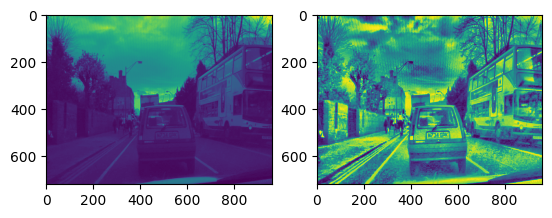

In [10]:
for filename in os.listdir("CamVid/val"):
    if filename == ".ipynb_checkpoints":
        continue
    processed_file_name = filename[:-4] + "_P" + filename[-4:]
    ori_image = np.array(Image.open("CamVid/val/" + filename).convert('L'))
    processed_image = np.array(Image.open("CamVid/val_processed/" + processed_file_name).convert('L'))
    print(processed_image.shape)
    print(filename, processed_file_name)
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(ori_image)
    # ax1.title("original image")
    ax2.imshow(processed_image)
    # ax2.title("processed image")
    break